## Objective
The goal of this project is to use unsupervised learning models to find movies that are similar to one another via clustering. This will be achieved by using the movie database dataset of 5000 movies. 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy import stats
from google.colab import files
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN
import io

import warnings
warnings.filterwarnings('ignore')

In [0]:
#To start, I will begin importing these files on the movies and credits. 
uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies (1).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "tmdb_5000_movies.csv" with length 5698602 bytes


In [0]:
df_1 = pd.read_csv(io.StringIO(uploaded['tmdb_5000_movies.csv'].decode('utf-8')))
df_1 = pd.read_csv('tmdb_5000_movies.csv')

I am going to begin doing data exploration and cata cleaning for the first file. Once this is done, I will do it on the second file then concatenate all clean features and dummies. 

In [0]:
df_1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [0]:
df_1.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [0]:
df_1.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [0]:
#Alright. I see we have null values in the homepage column, overview column, release_date, runtime and tagline columns. 
#I intend on dropping the homepage, overview, and tagline as this will not be relevant to my analysis. 
df_2 = df_1.drop(['homepage', 'overview', 'tagline'], axis=1)

In [0]:
df_2.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [0]:
df_2[df_2.isnull().any(axis=1)]
#I will be dropping these columns since there is no information on revenue nor runtime and they are only three observations

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0
4553,0,[],380097,[],en,America Is Still the Place,0.000000,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


In [0]:
df_2 = df_2.dropna()

In [0]:
df_2.describe()
#there are some movies here with 0 for budget, revenue, runtime, vote_average, and vote_count. I am considering the possibility that some 
#movies have a 0 vote average and vote count, so I will be dropping those movies with 0 for revenue, budget, and runtime. 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,56949.011667,21.505569,8.231205e+07,106.898125,6.094458,690.646875
std,4.073029e+07,88292.839372,31.822163,1.628950e+08,22.561593,1.188366,1234.852449
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.750000,4.682212,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.500000,12.928897,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58512.500000,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [0]:
df_2.loc[df_2['budget'] == 0].count()

budget                  1036
genres                  1036
id                      1036
keywords                1036
original_language       1036
original_title          1036
popularity              1036
production_companies    1036
production_countries    1036
release_date            1036
revenue                 1036
runtime                 1036
spoken_languages        1036
status                  1036
title                   1036
vote_average            1036
vote_count              1036
dtype: int64

In [0]:
df_2.loc[df_2['revenue'] == 0].count()

budget                  1424
genres                  1424
id                      1424
keywords                1424
original_language       1424
original_title          1424
popularity              1424
production_companies    1424
production_countries    1424
release_date            1424
revenue                 1424
runtime                 1424
spoken_languages        1424
status                  1424
title                   1424
vote_average            1424
vote_count              1424
dtype: int64

In [0]:
df_2.loc[df_2['runtime'] == 0].count()
#The movies with a 0 runtime account for less than 1 percent of all observations, I will be dropping these. For the revenue and budget, I will be replacing
#the zero values with the median for the given year. 

budget                  34
genres                  34
id                      34
keywords                34
original_language       34
original_title          34
popularity              34
production_companies    34
production_countries    34
release_date            34
revenue                 34
runtime                 34
spoken_languages        34
status                  34
title                   34
vote_average            34
vote_count              34
dtype: int64

In [0]:
df_2 = df_2[df_2.runtime != 0]

In [0]:
#Let's get the year in a seperate column for each observation.
df_2['Year'] = [d.split('-')[0] for d in df_2.release_date]
df_2['Month'] = [d.split('-')[1] for d in df_2.release_date]
df_2['revenue'].median()
df_2.loc[df_2['revenue'] == 0]

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,[],en,The Lovers,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Lovers,4.8,34,2015,02
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Wolfman,5.5,549,2010,02
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cat in the Hat,4.9,366,2003,11
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Son of the Mask,3.6,338,2005,02
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,Volcano,5.2,376,1997,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",67238,[],en,Cavite,0.022173,[],[],2005-03-12,0,80.0,[],Released,Cavite,7.5,2,2005,03
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,Newlyweds,0.642552,[],[],2011-12-26,0,85.0,[],Released,Newlyweds,5.9,5,2011,12
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",7.0,6,2013,10
4801,0,[],126186,[],en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Shanghai Calling,5.7,7,2012,05


In [0]:
df_2['budget'] = df_2['budget'].replace(0, np.nan)
df_2['revenue'] = df_2['revenue']. replace(0, np.nan)
df_2.isna().sum()

budget                  1004
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1391
runtime                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
Year                       0
Month                      0
dtype: int64

In [0]:
df_2.budget = df_2.groupby('Year')['budget'].apply(lambda x: x.fillna(x.mean()))
df_2.revenue = df_2.groupby('Year')['revenue'].apply(lambda x: x.fillna(x.mean()))

In [0]:
df_2.isna().sum()
#it looks like getting the average didn't work for all the entries as there might have been an observation with a missing budget and revenue value but it was 
#the only one for it's year. These will get dropped since it is only one per column. 

budget                  1
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 1
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
Year                    0
Month                   0
dtype: int64

In [0]:
df_3 = df_2.dropna()
#on to cleaning the other features...

In [0]:

genres = df_3.genres

In [0]:
type(genres)

pandas.core.series.Series

In [0]:
genres_list = genres.to_list()

In [0]:
type(genres_list)

list

In [0]:
len(genres_list)

4765

In [0]:
list_of_genres = []

In [0]:
len(list_of_genres)

0

In [0]:
# create correct list of genres
for genre in genres_list:
    list_of_genres.append(eval(genre))

In [0]:
list_of_genres[1]

[{'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 28, 'name': 'Action'}]

In [0]:
genres_entry = []

In [0]:
for genres in list_of_genres:
    names = ''
    for key, value in enumerate(genres):
        names += value['name'] + ', '
    # append to list
    genres_entry.append(names[:-2])

In [0]:
len(genres_entry)

4765

In [0]:
# genres_entry

In [0]:
df_3.genres = genres_entry

In [0]:
df_3.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month
0,237000000.0,"Action, Adventure, Fantasy, Science Fiction",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009,12
1,300000000.0,"Adventure, Fantasy, Action",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,05
2,245000000.0,"Action, Adventure, Crime",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015,10
3,250000000.0,"Action, Crime, Drama, Thriller",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012,07
4,260000000.0,"Action, Adventure, Science Fiction",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012,03


In [0]:
production_comp = df_3.production_companies


In [0]:
production_comp_list = production_comp.to_list()
len(production_comp_list)

4765

In [0]:
list_of_companies = []
len(list_of_companies)


0

In [0]:
for company in production_comp_list:
  list_of_companies.append(eval(company))

In [0]:
list_of_companies[1]

[{'id': 2, 'name': 'Walt Disney Pictures'},
 {'id': 130, 'name': 'Jerry Bruckheimer Films'},
 {'id': 19936, 'name': 'Second Mate Productions'}]

In [0]:
company_entry = []

In [0]:
for companies in list_of_companies:
    names = ''
    for key, value in enumerate(companies):
        names += value['name'] + ', '
    # append to list
    company_entry.append(names[:-2])

In [0]:
len(company_entry)


4765

In [0]:
keywords = df_3.keywords

In [0]:
keyword_list = keywords.to_list()
list_of_keywords = []

In [0]:
for keyword in keyword_list:
  list_of_keywords.append(eval(keyword))
  keyword_entry = []

In [0]:
for keyword in list_of_keywords:
  names = ''
  for key,value in enumerate(keyword):
    names += value['name'] + ', '
  keyword_entry.append(names[:-2])

In [0]:
len(keyword_entry)

4765

In [0]:
df_3.keywords = keyword_entry
df_3.production_companies = company_entry

In [0]:
df_3.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month
0,237000000.0,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009,12
1,300000000.0,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,05
2,245000000.0,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,107.376788,"Columbia Pictures, Danjaq, B24","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015,10
3,250000000.0,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012,07
4,260000000.0,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,43.926995,Walt Disney Pictures,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012,03


In [0]:
prod_countries = df_3.production_countries
country_list = prod_countries.to_list()
list_of_countries = []

In [0]:
for country in country_list: 
  list_of_countries.append(eval(country))
  country_entry = []

In [0]:
for country in list_of_countries:
  names = ''
  for key,value in enumerate(country):
    names += value['name'] + ', '
  country_entry.append(names[:-2])

In [0]:
len(country_entry)
df_3.production_countries = country_entry
df_3.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month
0,237000000.0,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009,12
1,300000000.0,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,05
2,245000000.0,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015,10
3,250000000.0,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012,07
4,260000000.0,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012,03


In [0]:
languages_spoken = df_3.spoken_languages

In [0]:
language_list = languages_spoken.to_list()

In [0]:
other_language_list = []

In [0]:
for language in language_list: 
  other_language_list.append(eval(language))

In [0]:
language_entry = []

In [0]:
for language in other_language_list:
  names = ''
  for key,value in enumerate(language):
    names += value['name'] + ', '
  language_entry.append(names[:-2])

In [0]:
len(language_entry)

4765

In [0]:
df_3.spoken_languages = language_entry

Note: I will not being any boxcox/log transformations since the unsupervised learning models require the data to be standardized.

##Data Exploration


First, I will begin creating histograms for those numeric , continuous data.

In [0]:
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count' ]

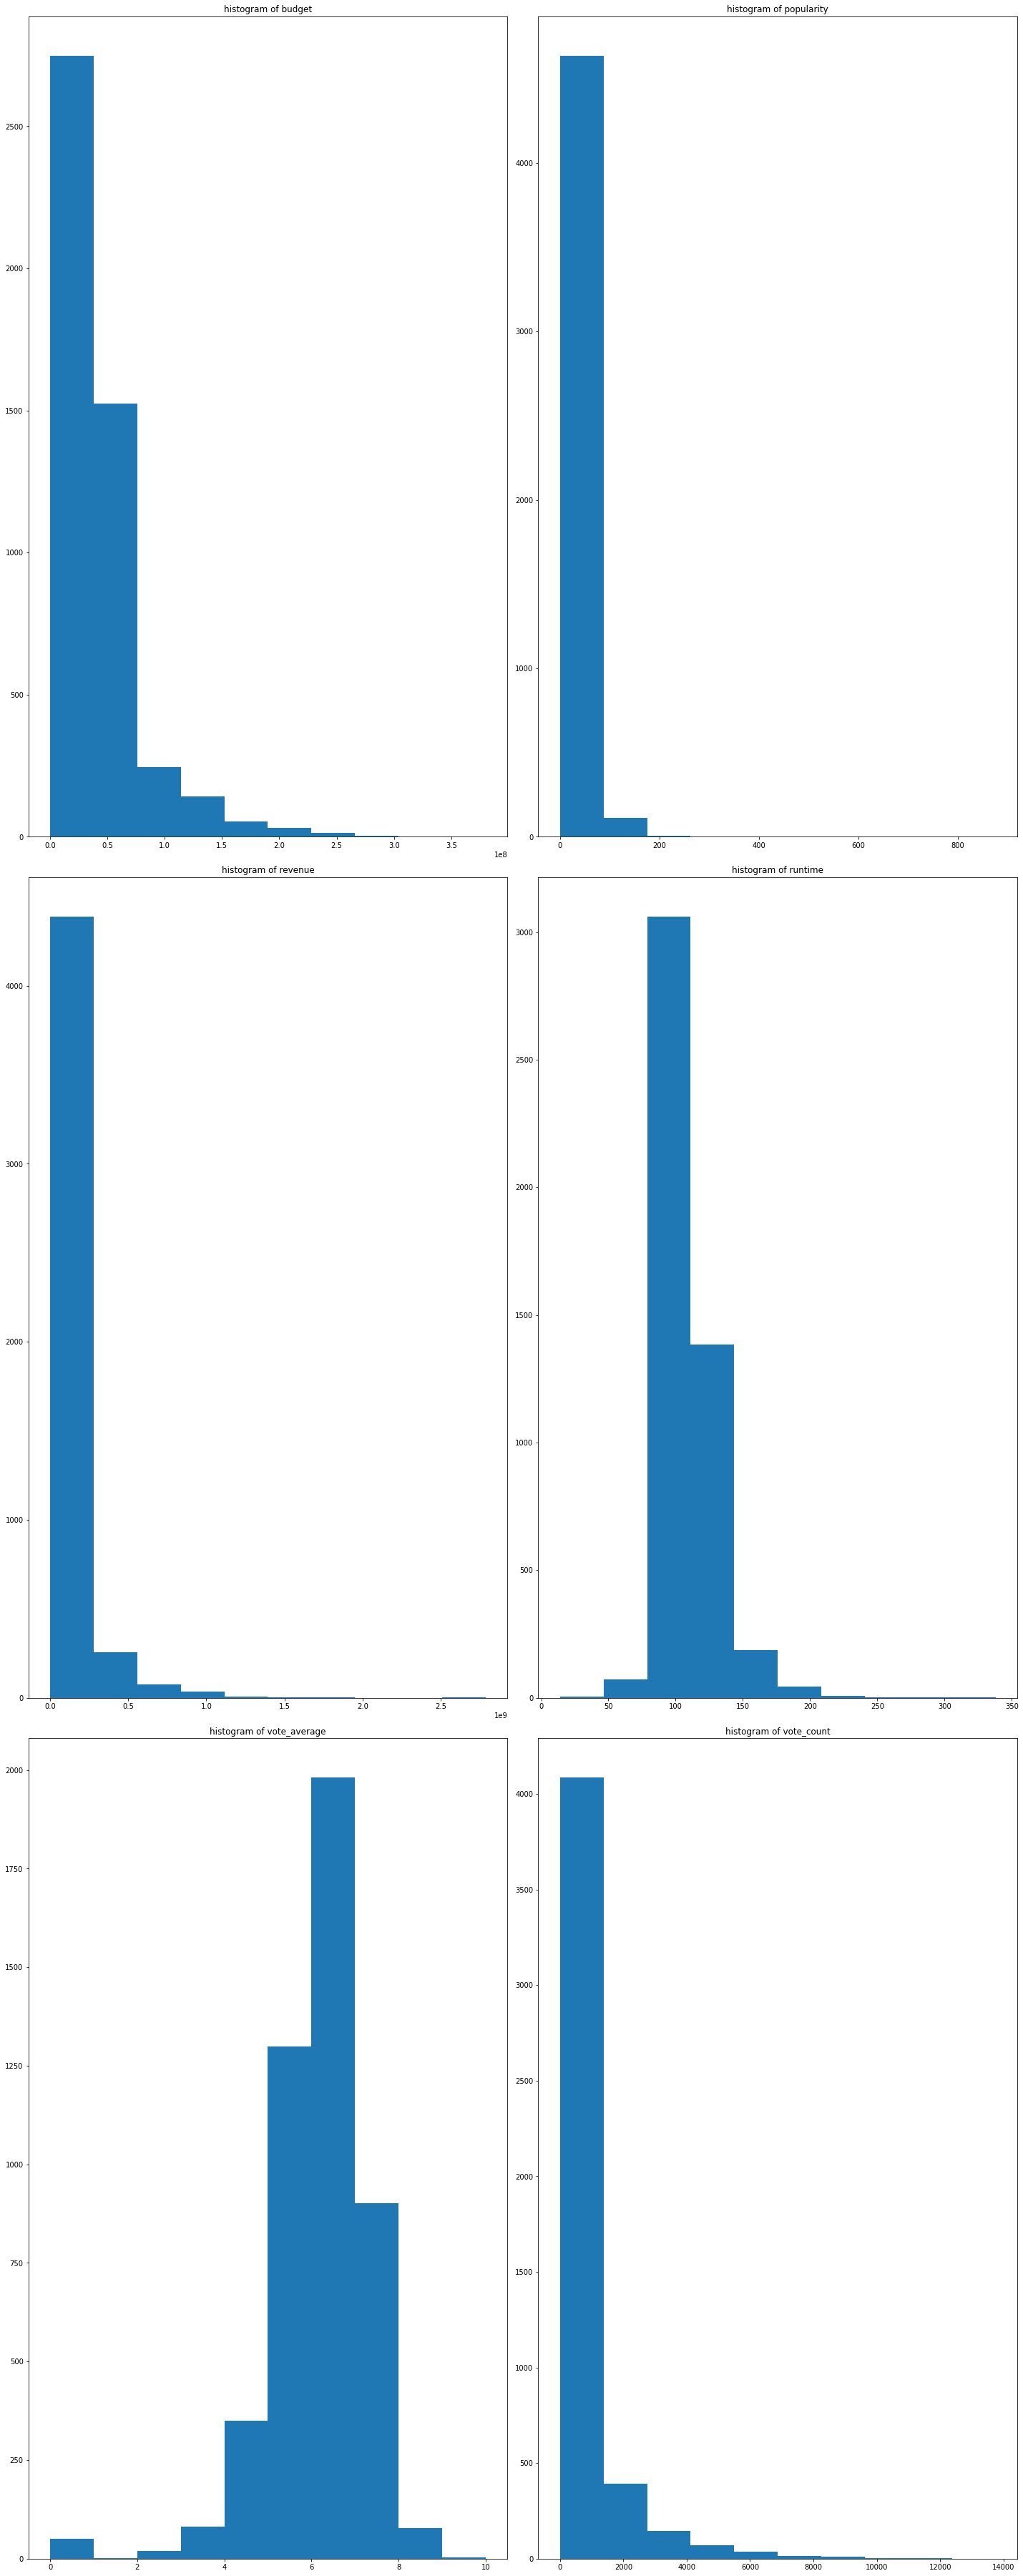

In [0]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(numeric_columns):
  plt.subplot(len(numeric_columns), 2, i+1)
  plt.hist(df_3[col])
  plt.title('histogram of {}'.format(col))

plt.tight_layout()
plt.show()

In [0]:
categorical_columns = ['original_language', 'status']

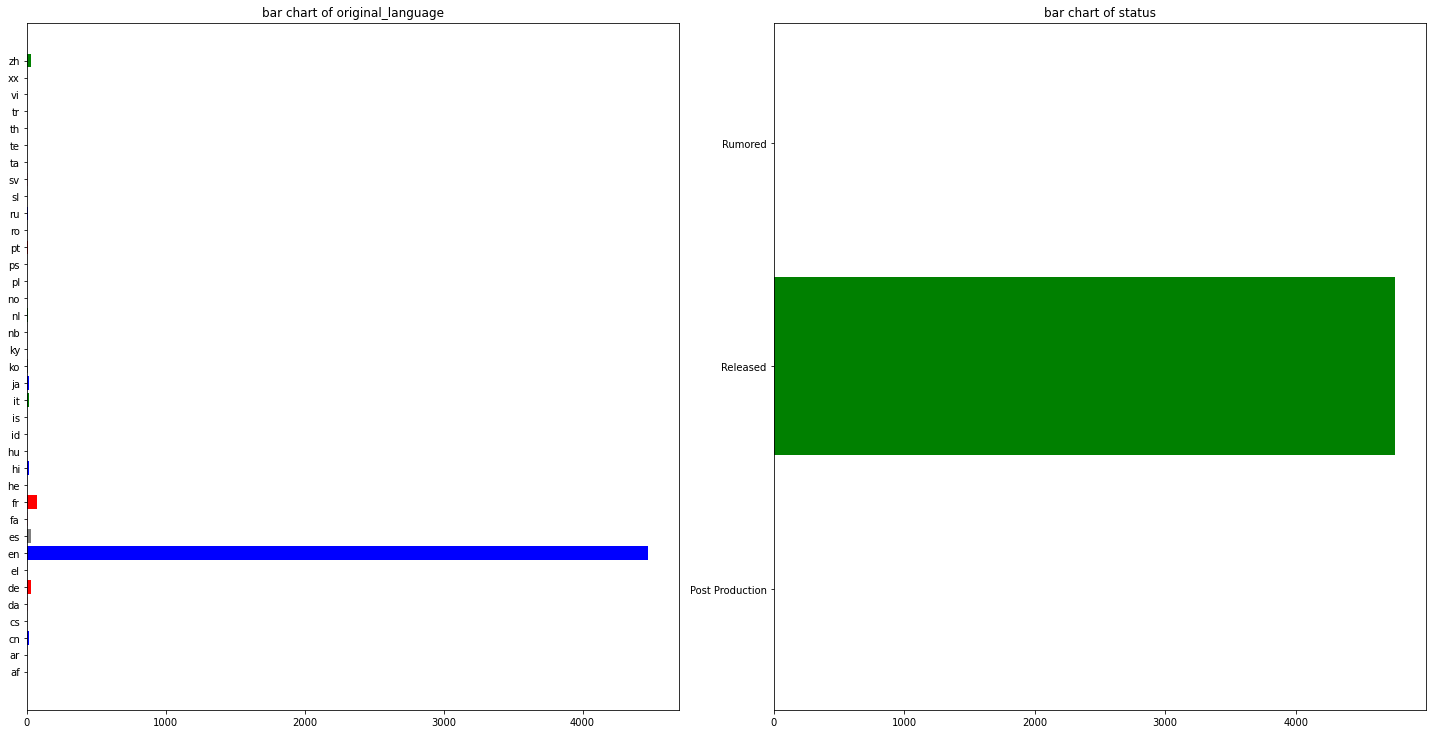

In [0]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(categorical_columns):
  plt.subplot(len(categorical_columns), 2, i+1)
  plt.barh(df_3.groupby(col)[col].count().index, 
          df_3.groupby(col)[col].count(), 
          color=["red","green","blue","grey","pink"])
  plt.title('bar chart of {}'.format(col))

plt.tight_layout()
plt.show()

In [0]:
df_numeric = df_3[numeric_columns]
df_numeric.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.430417,0.668085,0.217727,0.001077,0.529726
popularity,0.430417,1.000000,0.561450,0.221754,0.275435,0.777511
revenue,0.668085,0.561450,1.000000,0.189381,0.092335,0.709294
runtime,0.217727,0.221754,0.189381,1.000000,0.337388,0.276596
vote_average,0.001077,0.275435,0.092335,0.337388,1.000000,0.318299
vote_count,0.529726,0.777511,0.709294,0.276596,0.318299,1.000000


In [0]:
#I want to see what features have the highest correlation with the vote average...
numeric_correlations = df_numeric.corr()
numeric_correlations['vote_average'].sort_values()

budget          0.001077
revenue         0.092335
popularity      0.275435
vote_count      0.318299
runtime         0.337388
vote_average    1.000000
Name: vote_average, dtype: float64

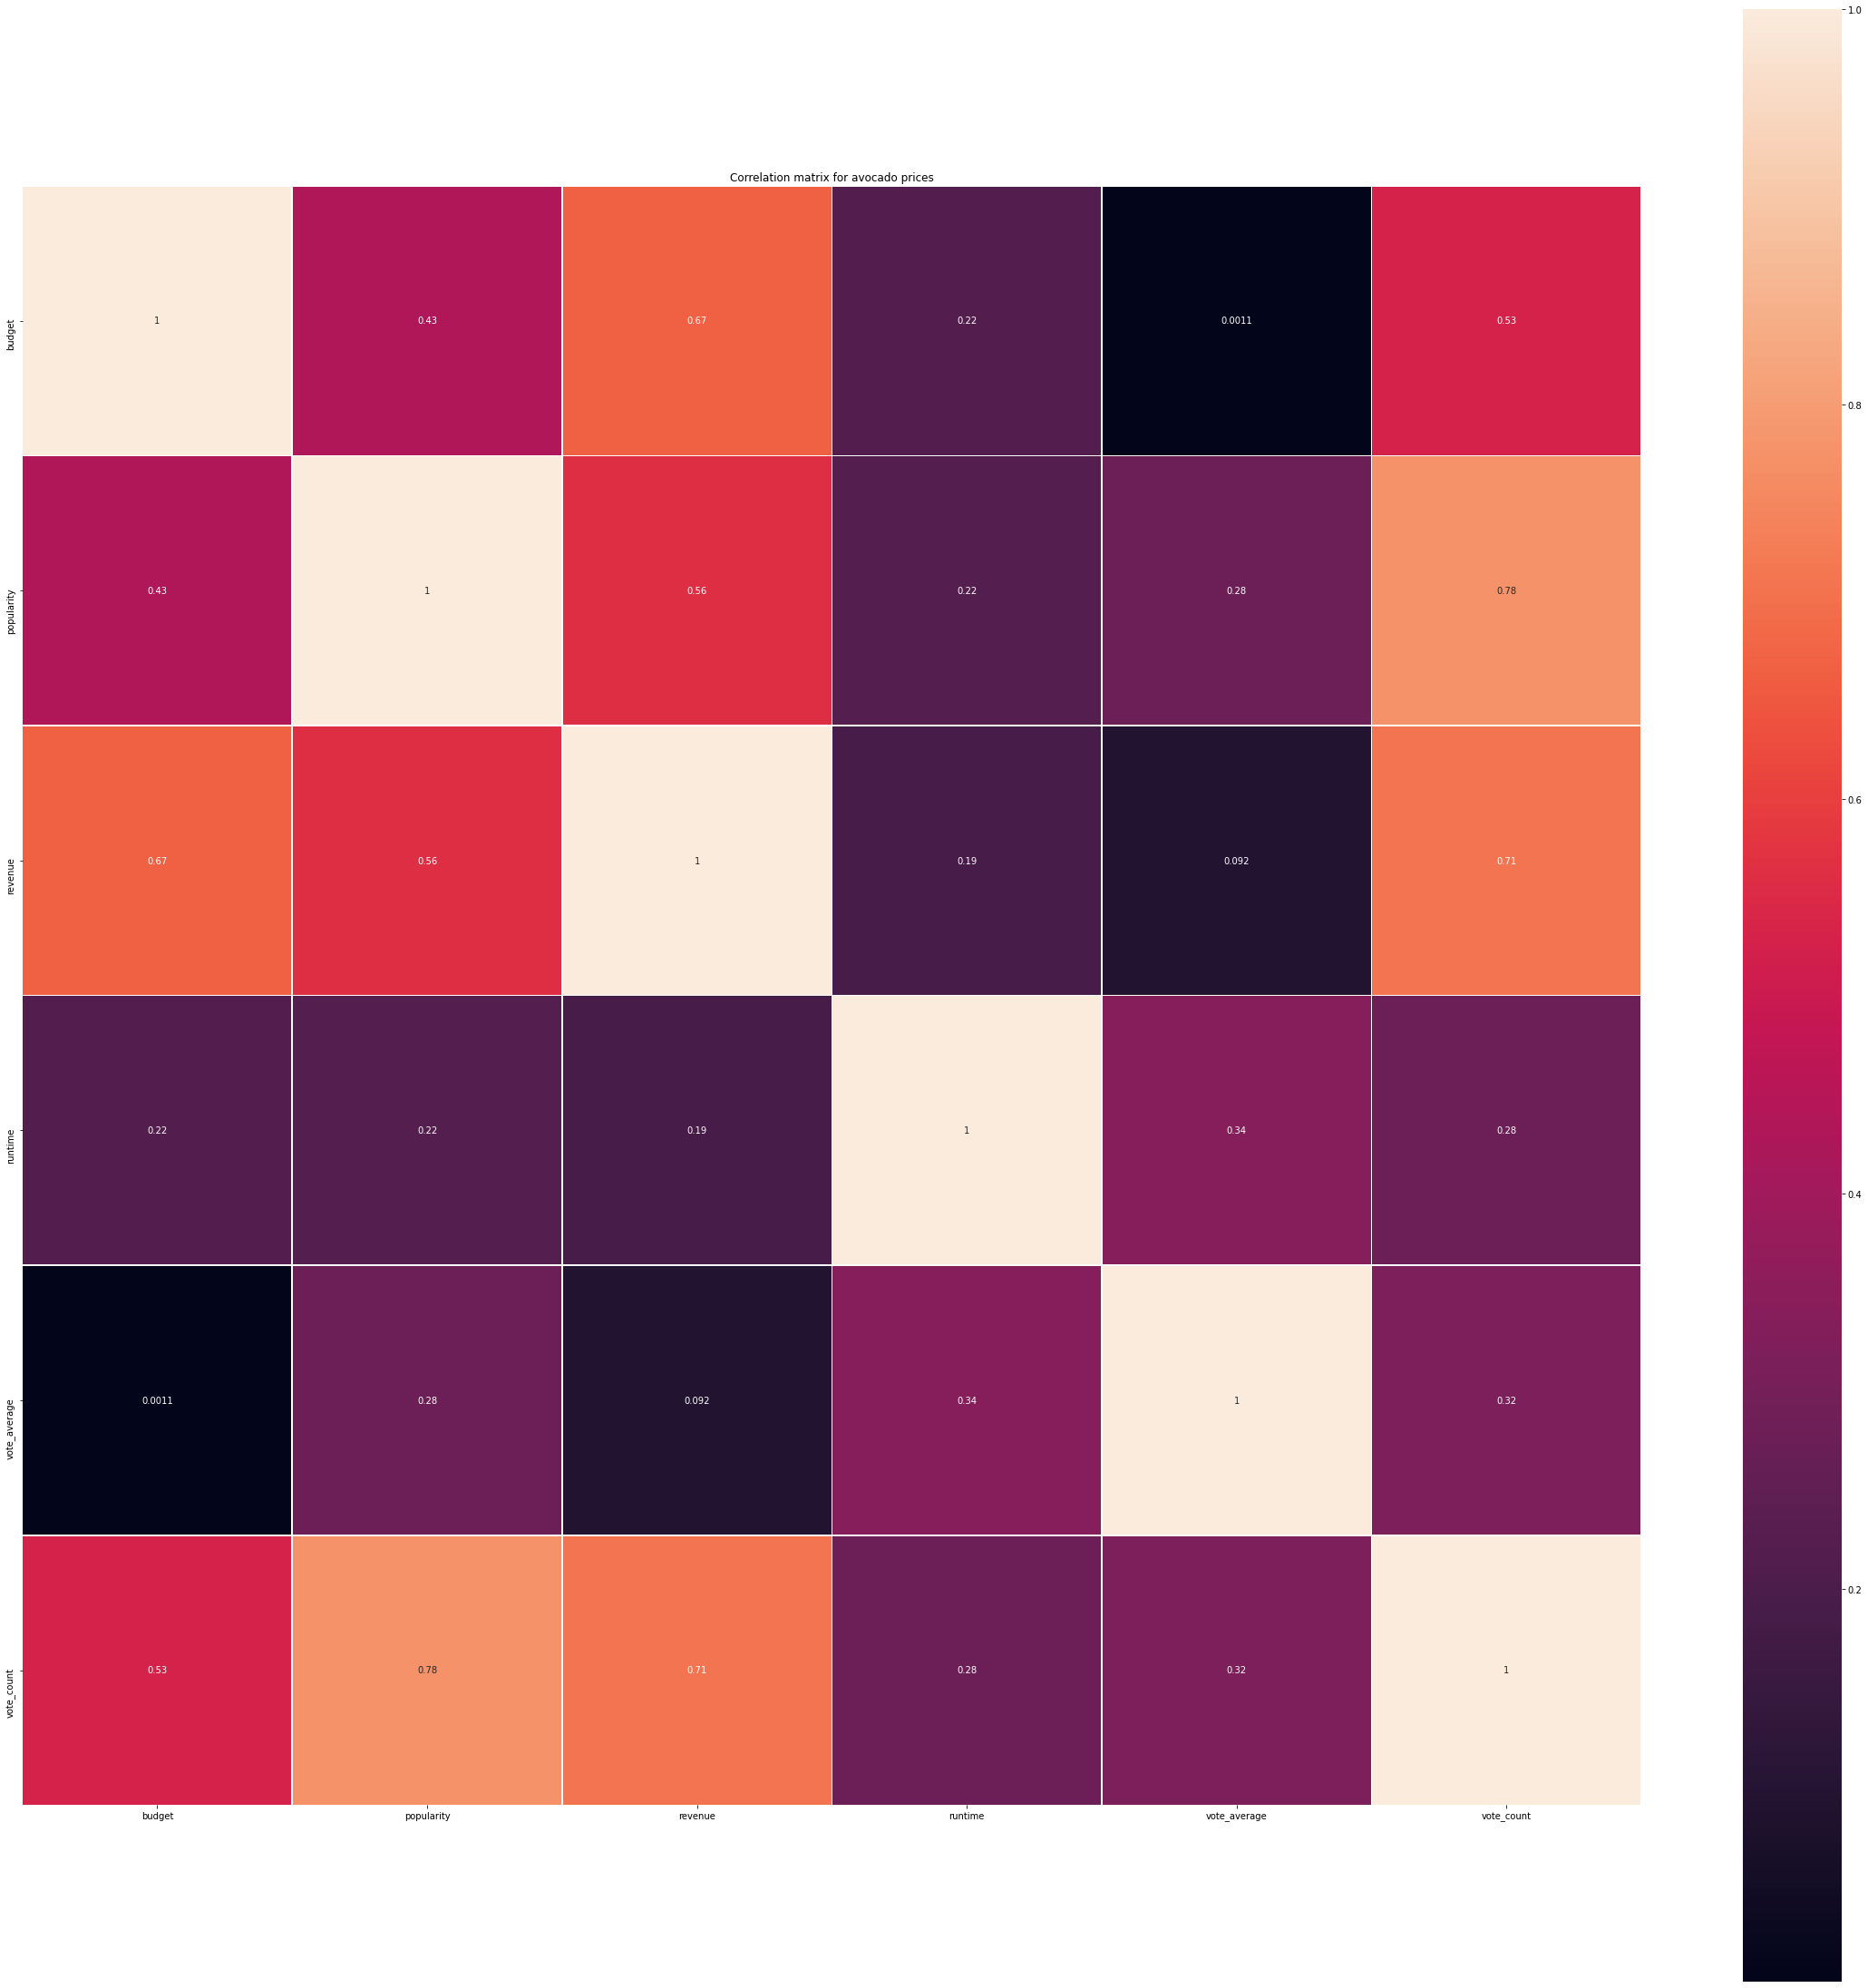

In [0]:
import seaborn as sns
coormat = df_numeric.corr()

plt.figure(figsize=(40,40))
plt.title('Correlation matrix for avocado prices')

sns.heatmap(coormat, square=True, annot=True, linewidth= .5)

In [0]:
df_3.Year.unique()

array(['2009', '2007', '2015', '2012', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1944', '1938', '1949', '1936',
       '1941', '1955', '1942', '1929', '1935', '1933', '1916', '1934',
       '1925'], dtype=object)

In [0]:
#I now want to create a line graph for the numerical, continuous features by year. 
df_numeric['Year'] = df_3.Year


In [0]:
df_averages = df_numeric.groupby(['Year'],as_index=False).mean()

In [0]:


df_averages.Year = pd.to_numeric(df_averages['Year'])
yrs = df_averages.Year



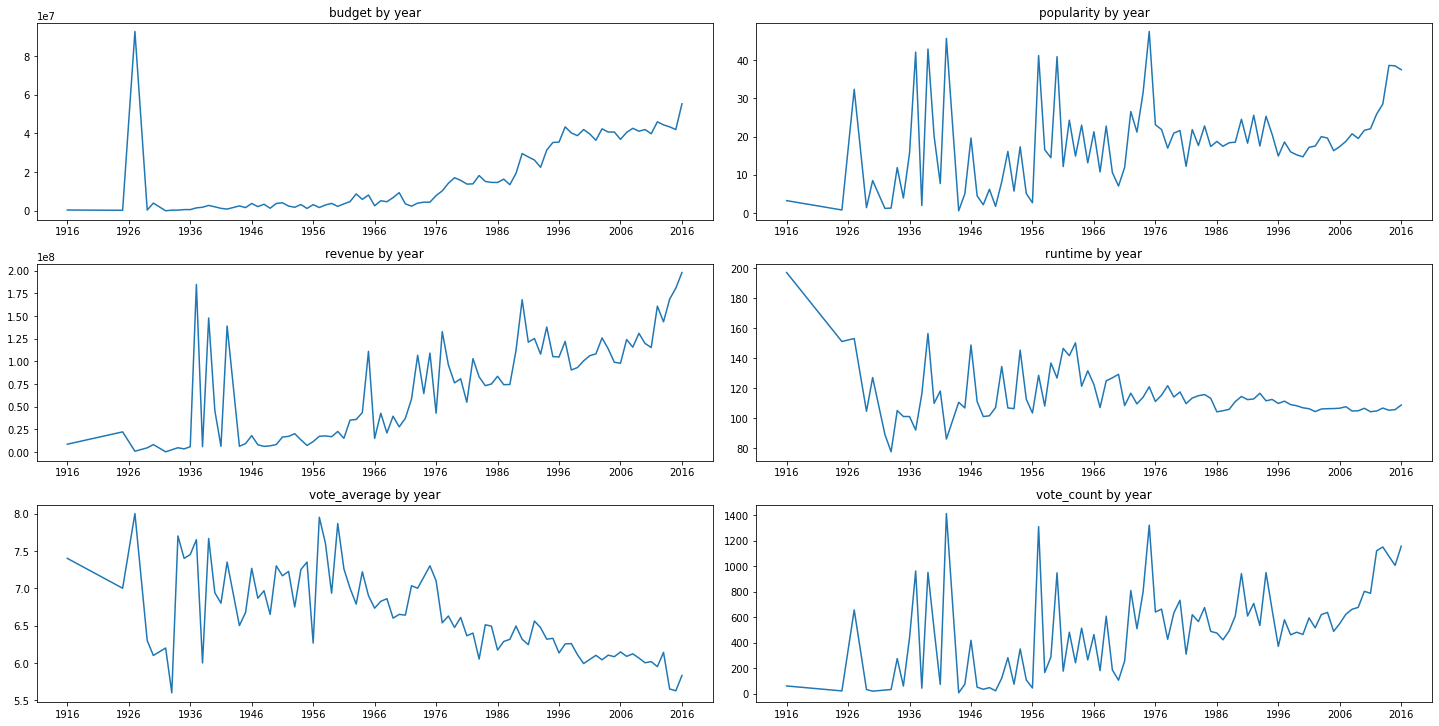

In [0]:
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns):
  plt.subplot(len(numeric_columns), 2, i+1)
  plt.plot(df_averages['Year'], df_averages[col])
  plt.xticks(np.arange(min(yrs), max(yrs)+1, 10))
  plt.title('{} by year'.format(col))


plt.tight_layout()
plt.show()

##More Data Exploration and Feature Engineering
I will be creating dummies for the categorical features as part of the data exploration process now so I can create bar graphs representing the counts of these categorical features.

Text(0.5, 1.0, 'Frequency by Genre')

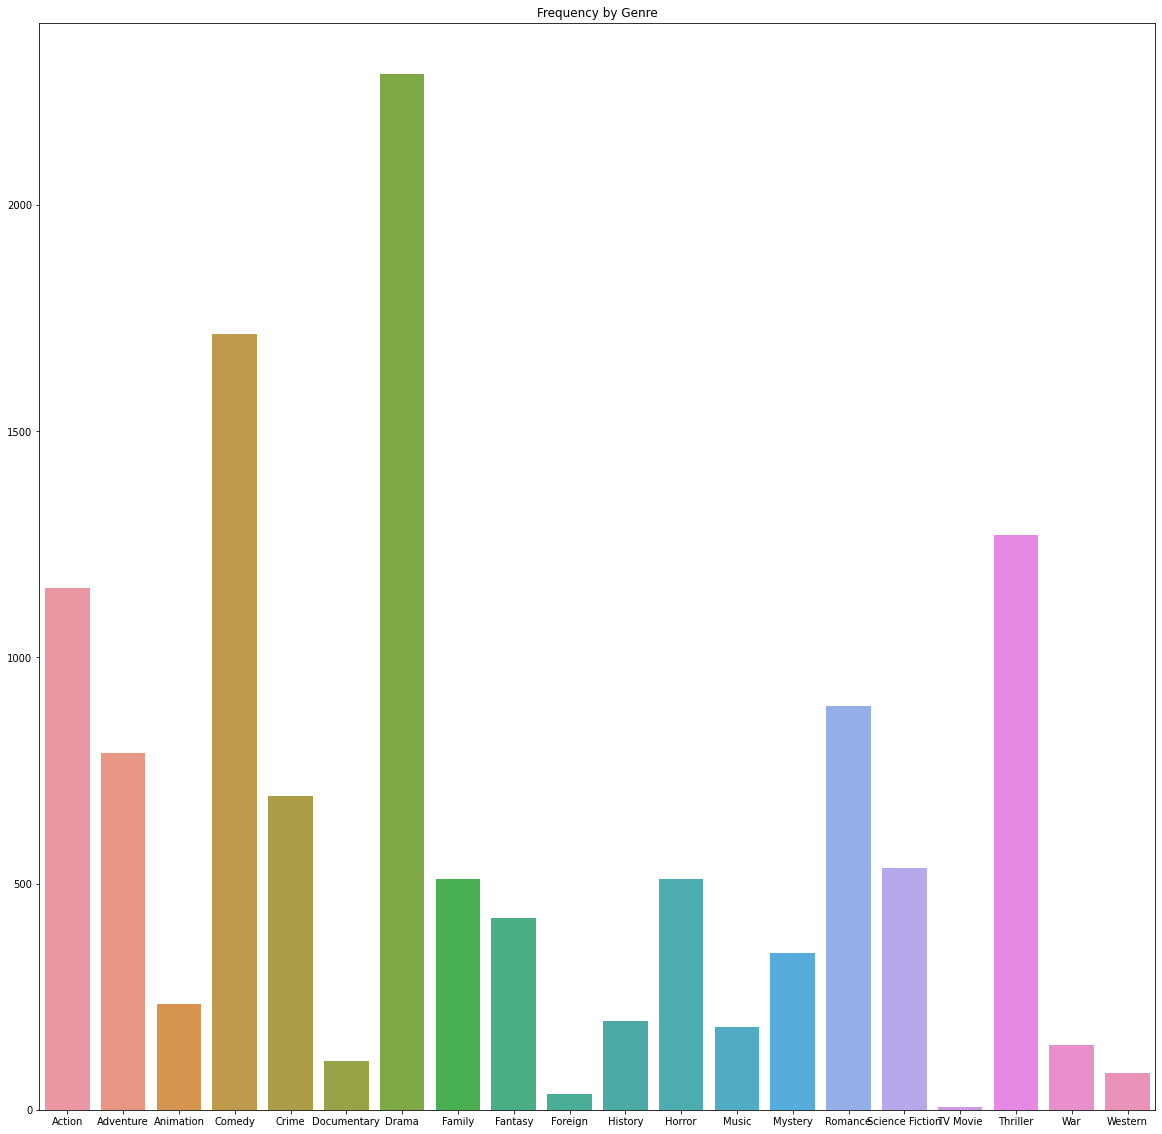

In [0]:
genre_dummies = df_3.genres.str.get_dummies(', ')

columns = list(genre_dummies)
sums = []
for i in columns:
  sum = genre_dummies[i].sum()
  sums.append(sum)

fig = plt.figure(figsize=(20,20))
sns.barplot(columns, sums)
plt.title('Frequency by Genre')


In [0]:
keyword_dummies = df_3.keywords.str.get_dummies(', ')
keyword_dummies.head()



,15th century,16th century,17th century,18th century,1910s,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,19th century,2000 ad,20th century,21st century,25th century,2nd century,3d,abandoned house,abandoned mine,abduction,abolitionist,aboriginal,aborigine,abortion,abraham lincoln,absorbing power,absurdism,abuse,abusive father,abusive husband,abusive marriage,acapella,accepting death,accident,accidental love,accountant,acid,...,young adult,young boy,young couple,young entrepreneur,young heroes,young love,young people,young woman,youngster,youth,youth center,youth gang,youtube,yucatec maya language,yukon,yuppie,zagreb,zebra,zeppelin,zero gravity,zeus,zip line,zombie,zombie apocalypse,zombification,zoo,zookeeper,zurich,,begins with text,flipping coin,gilbert and sullivan,nightgown,north carolinam,nosferatu,strange noise,Γη,卧底肥妈,绝地奶霸,超级妈妈
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Frequency of Original Languages')

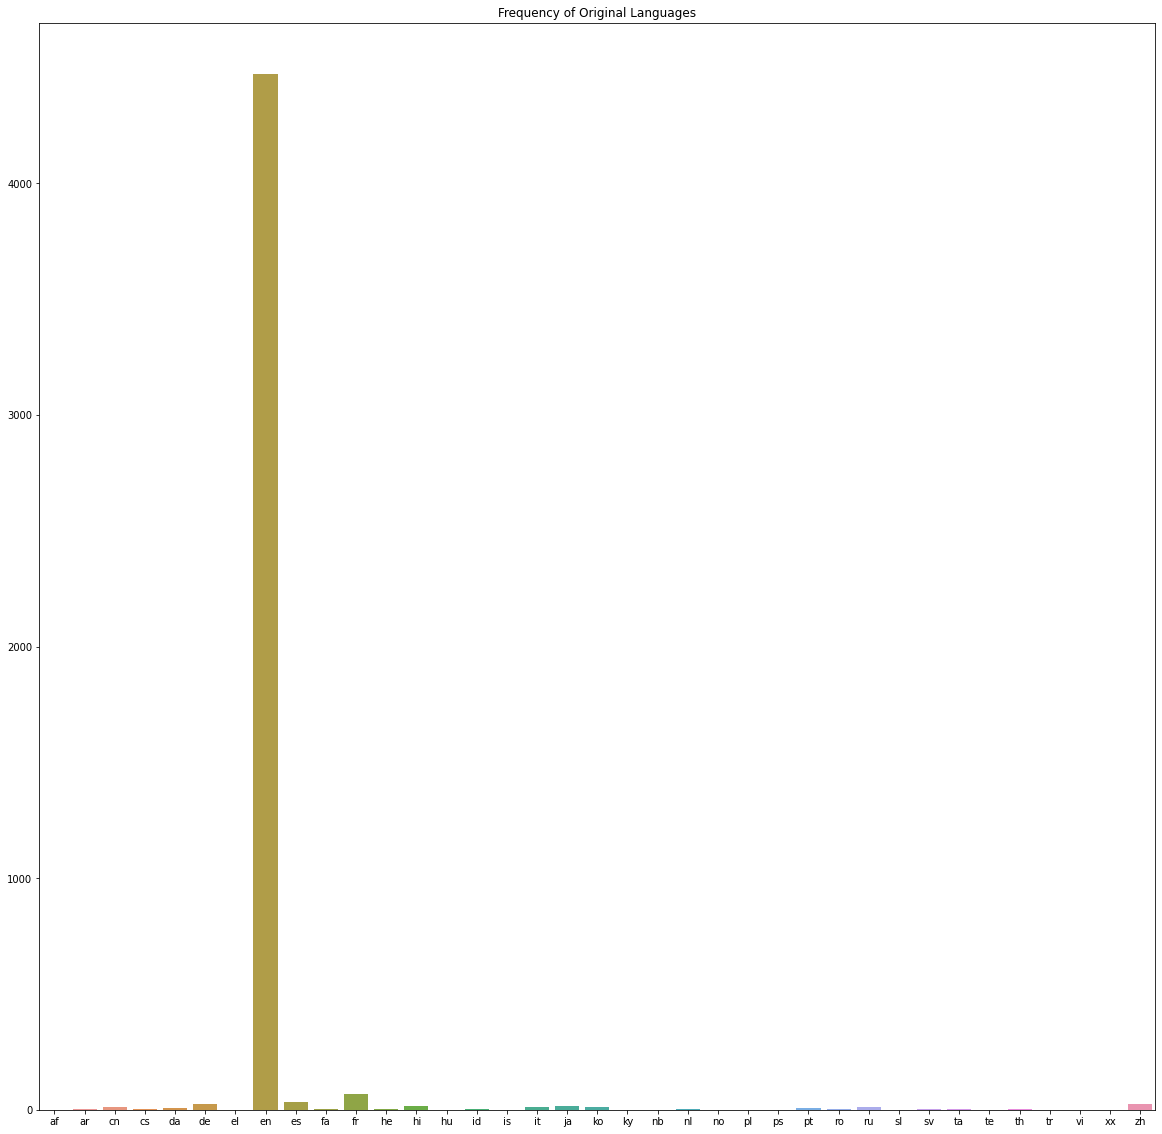

In [0]:
original_language_dummies = df_3.original_language.str.get_dummies()
original_language_dummies.head()

columns = list(original_language_dummies)
sums = []
for i in columns:
  sum = original_language_dummies[i].sum()
  sums.append(sum)

fig = plt.figure(figsize=(20,20))
sns.barplot(columns, sums)
plt.title('Frequency of Original Languages')

In [0]:
company_dummies = df_3.production_companies.str.get_dummies(', ')
company_dummies.head()



,"""DIA"" Productions GmbH & Co. KG",1.85 Films,10 West Studios,100 Bares,1019 Entertainment,101st Street Films,10th Hole Productions,120 Films,120dB Films,13 Ghosts Productions Canada Inc.,1492 Pictures,16 Block Productions,1812 Productions,1818,1821 Pictures,19 Entertainment,1984 Private Defense Contractors,2 Entertain,2 Loop Films,2.4.7. Films,2003 Productions,20th Century Fox Home Entertainment,20th Century Fox Russia,21 Laps Entertainment,21st Century Film Production,22 & Indiana Pictures,26 Films,2929 Productions,2DUX²,2S Films,3 Arts Entertainment,3 Dogs and a Pony,3 Miles Apart Productions Ltd.,3 in the Box,30 Something Productions,31 Juin Films,33 Pictures,33andOut Productions,34th Street Films,360 Pictures,...,Zentropa International Sweden,Zephyr Films,Zero Fiction Film,Zero Gravity Management,Zeta Film,Zhejiang Huace Film & TV,Zide-Perry Productions,Zinc Entertainment Inc.,Zininsa Film Production,Zip Films,Zippcast Films,Zoetrope Studios,Zookeeper Productions,Zoom Hunt International Productions Company Ltd.,Zucker/Netter Productions,Zupnik Cinema Group II,Zwart Arbeid,area japan,bob industries,chateau productions,d-rights,double A Films,every tribe entertainment,i5 Films,icon,kNow Productions,lucky crow films,nWave Pictures,ntc,platinum studios,rusty bear entertainment,thefyzz,thinkfilm,uFilm,unafilm,verture Films,warner bross Turkey,winchester films,África Filmes,Österreichischer Rundfunk (ORF)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
country_dummies = df_3.production_countries.str.get_dummies(', ')
country_dummies.head()



,Afghanistan,Algeria,Angola,Argentina,Aruba,Australia,Austria,Bahamas,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Cambodia,Cameroon,Canada,Chile,China,Colombia,Cyprus,Czech Republic,Denmark,Dominica,Dominican Republic,Ecuador,Egypt,Fiji,Finland,France,Germany,Greece,Guadaloupe,Guyana,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,...,Kyrgyz Republic,Lebanon,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Monaco,Morocco,Netherlands,New Zealand,Nigeria,Norway,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Romania,Russia,Serbia,Serbia and Montenegro,Singapore,Slovakia,Slovenia,South Africa,South Korea,Spain,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
spoken_language_dummies = df_3.spoken_languages.str.get_dummies(', ')
spoken_language_dummies.head()

,??????,Afrikaans,Bahasa indonesia,Bamanankan,Bosanski,Català,Cymraeg,Dansk,Deutsch,Eesti,English,Español,Esperanto,Français,Gaeilge,Galego,Hrvatski,Italiano,Kiswahili,Latin,Magyar,Nederlands,No Language,Norsk,Polski,Português,Pусский,Română,Slovenčina,Slovenščina,Somali,Srpski,Tiếng Việt,Türkçe,Wolof,isiZulu,shqip,suomi,svenska,Íslenska,Český,ελληνικά,Український,български език,қазақ,עִבְרִית,اردو,العربية,فارسی,پښتو,हिन्दी,বাংলা,ਪੰਜਾਬੀ,தமிழ்,తెలుగు,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
status_dummies = df_3.status.str.get_dummies()

In [0]:
month_dummies = df_3.Month.str.get_dummies()

In [0]:
#I now want tp put together the dummies and all the features we want to use. I will refer to this as x. 
df_3.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month
0,237000000.0,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2.787965e+09,162.0,"English, Español",Released,Avatar,7.2,11800,2009,12
1,300000000.0,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,9.610000e+08,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,05
2,245000000.0,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,8.806746e+08,148.0,"Français, English, Español, Italiano, Deutsch",Released,Spectre,6.3,4466,2015,10
3,250000000.0,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1.084939e+09,165.0,English,Released,The Dark Knight Rises,7.6,9106,2012,07
4,260000000.0,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-03-07,2.841391e+08,132.0,English,Released,John Carter,6.1,2124,2012,03


In [0]:
df_3.Year = pd.to_numeric(df_3.Year)

In [0]:
df_4 = df_3.drop(['genres','id', 'keywords', 'original_language', 'original_title', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'title', 'Month' ], axis=1)

In [0]:
numeric_and_dummies = pd.concat([df_4, genre_dummies, status_dummies, month_dummies ], axis = 1)
#FYI: I will not be including the language, company, country, or spoken language dummies in the analysis as it crashed the kernel when I was trying to scale the data.

In [0]:
numeric_and_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4765 entries, 0 to 4802
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           4765 non-null   float64
 1   popularity       4765 non-null   float64
 2   revenue          4765 non-null   float64
 3   runtime          4765 non-null   float64
 4   vote_average     4765 non-null   float64
 5   vote_count       4765 non-null   int64  
 6   Year             4765 non-null   int64  
 7   Action           4765 non-null   int64  
 8   Adventure        4765 non-null   int64  
 9   Animation        4765 non-null   int64  
 10  Comedy           4765 non-null   int64  
 11  Crime            4765 non-null   int64  
 12  Documentary      4765 non-null   int64  
 13  Drama            4765 non-null   int64  
 14  Family           4765 non-null   int64  
 15  Fantasy          4765 non-null   int64  
 16  Foreign          4765 non-null   int64  
 17  History       

In [0]:
remove_n = 1
drop_indices = np.random.choice(numeric_and_dummies.index, remove_n, replace=False)
numeric_and_dummies_subset = numeric_and_dummies.drop(drop_indices)

## Unsupervised Learning
I am now going to go on and build the models now that I have all the dummies and features that I need. Before jumping into this, I want to point out that there is no y variable for this data, we are just working to cluster the observations.

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import datasets, metrics
from scipy import stats
scaler = StandardScaler()
X_std = scaler.fit_transform(numeric_and_dummies_subset)



In [0]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [0]:

ypred = pd.DataFrame()


for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    print(len(X_half1))
    print(len(X_pcahalf1))
    print(len(X_half2))
    print(len(X_pcahalf2))
    
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
   
    for nclust in range(2, 6):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

2382
2382
2382
2382
2382
2382
2382
2382


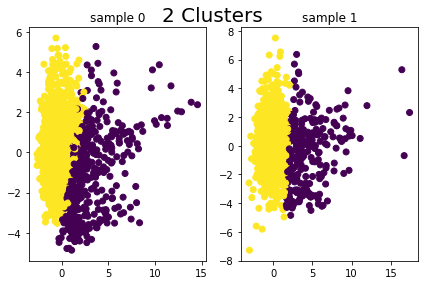

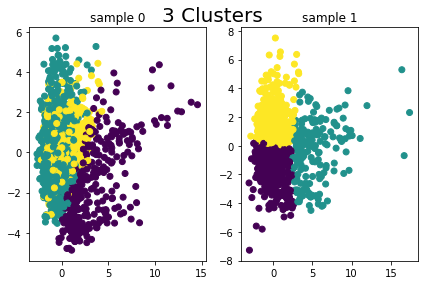

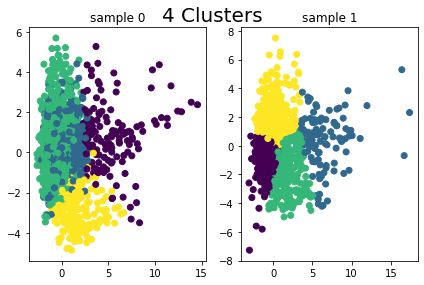

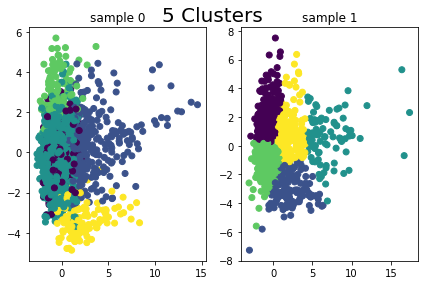

In [0]:
#I will be testing out different amounts of clusters here, from 2 to 5
for cluster in range(2, 6):
    
    
    f, axarr = plt.subplots(1, 2)
    
    
    for i in range(2):
        
        
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [0]:
n = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#I am going to be testing out the shilouhette score for the above clusters along with 6-10 clusters. )

for number in n:
  labels = KMeans(n_clusters=number, random_state=123).fit_predict(X_std)
  print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

#Interestingly, 19 clusters had the strongest shilouette score. 

0.1768386212541242
0.052395452764070885
0.04929913173844044
0.05838023367991952
0.05678688864743185
0.07849631667436588
0.08044781214375663
0.08675936156764012
0.09341615986224124
0.0997897179769633
0.10456082458174115
0.11249172821527015
0.14916478397279465
0.17606077605515508
0.20022035617888762
0.19840809409898302
0.20542266142857296
0.19740058233697583
0.19961803201441478


# Mini Batch K Means

In [0]:
mini_data = scaler.fit_transform(numeric_and_dummies_subset)

10 loops, best of 3: 58.5 ms per loop


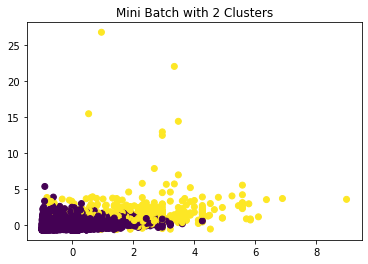

In [0]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(mini_data)
y_pred = mini_batch_k_means.predict(mini_data)


plt.scatter(mini_data[:,0], mini_data[:,1], c=y_pred)
plt.title('Mini Batch with 2 Clusters')
plt.show()

In [0]:
numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#I am going to be testing out the shilouhette score for the above clusters along with 6-10 clusters. )

for number in numbers:
  labels = MiniBatchKMeans(n_clusters=number, random_state=123).fit_predict(X_std)
  print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

#with 2 clusters the results are strongest here

0.2232708299582707
0.047501950118276154
0.049085028633904564
0.04646560187921443
0.05435569239427432
0.06144717130764234
0.056861153496068385
0.06319427054640973
0.09865402763358933
0.09149027583978134
0.12405323902908426
0.1125508849742664
0.0967217477116807
0.1068414530935936
0.09304981765615222
0.15125992578484485
0.13662794401393147
0.17789636512405
0.16849366991879913


# Agglomerative Clustering

In [0]:
#I will first begin with complete inkage

for number in numbers:
  agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters= number)


  clusters = agg_cluster.fit_predict(X_std)
  print("The silhoutte score of the Agglomerative Clustering solution with {} clusters: {}"
        .format((number),(metrics.silhouette_score(X_std, clusters, metric='euclidean'))))


The silhoutte score of the Agglomerative Clustering solution with 2 clusters: 0.057506681073440084
The silhoutte score of the Agglomerative Clustering solution with 3 clusters: -0.02518929605830655
The silhoutte score of the Agglomerative Clustering solution with 4 clusters: -0.007220360480046171
The silhoutte score of the Agglomerative Clustering solution with 5 clusters: -0.022820288073915285
The silhoutte score of the Agglomerative Clustering solution with 6 clusters: -0.007181061101995994
The silhoutte score of the Agglomerative Clustering solution with 7 clusters: 0.00837106776715214
The silhoutte score of the Agglomerative Clustering solution with 8 clusters: 0.024151026659434433
The silhoutte score of the Agglomerative Clustering solution with 9 clusters: 0.039048930182844444
The silhoutte score of the Agglomerative Clustering solution with 10 clusters: 0.05255131977551131
The silhoutte score of the Agglomerative Clustering solution with 11 clusters: 0.05657945557486277
The silh

In [0]:
for number in numbers:
  agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=number)


  clusters = agg_cluster.fit_predict(X_std)
  print("The silhoutte score of the Agglomerative Clustering solution with {} clusters: {}"
        .format((number), (metrics.silhouette_score(X_std, clusters, metric='euclidean'))))

The silhoutte score of the Agglomerative Clustering solution with 2 clusters: 0.19916227254603044
The silhoutte score of the Agglomerative Clustering solution with 3 clusters: 0.20446498659563778
The silhoutte score of the Agglomerative Clustering solution with 4 clusters: 0.1864065964743179
The silhoutte score of the Agglomerative Clustering solution with 5 clusters: 0.17913793211634418
The silhoutte score of the Agglomerative Clustering solution with 6 clusters: 0.18789646495936457
The silhoutte score of the Agglomerative Clustering solution with 7 clusters: 0.18548564438252244
The silhoutte score of the Agglomerative Clustering solution with 8 clusters: 0.1863188898976029
The silhoutte score of the Agglomerative Clustering solution with 9 clusters: 0.18993983189694902
The silhoutte score of the Agglomerative Clustering solution with 10 clusters: 0.19774398142318342
The silhoutte score of the Agglomerative Clustering solution with 11 clusters: 0.06308950684883882
The silhoutte score 

In [0]:
for number in numbers:
  agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=number)


  clusters = agg_cluster.fit_predict(X_std)
  print("The silhoutte score of the Agglomerative Clustering solution with {} clusters: {}"
        .format((number), (metrics.silhouette_score(X_std, clusters, metric='euclidean'))))

The silhoutte score of the Agglomerative Clustering solution with 2 clusters: 0.0821009937656731
The silhoutte score of the Agglomerative Clustering solution with 3 clusters: 0.06572525710763143
The silhoutte score of the Agglomerative Clustering solution with 4 clusters: 0.008817638352979466
The silhoutte score of the Agglomerative Clustering solution with 5 clusters: 0.024502556021327965
The silhoutte score of the Agglomerative Clustering solution with 6 clusters: 0.03212391833280372
The silhoutte score of the Agglomerative Clustering solution with 7 clusters: 0.038783789462452395
The silhoutte score of the Agglomerative Clustering solution with 8 clusters: 0.052017823694096944
The silhoutte score of the Agglomerative Clustering solution with 9 clusters: 0.0566253330966664
The silhoutte score of the Agglomerative Clustering solution with 10 clusters: 0.07224533209353073
The silhoutte score of the Agglomerative Clustering solution with 11 clusters: 0.08581140703837671
The silhoutte sc

Out of the agglomerative clustering, the ward linkage with 3 clusters looks to perform the best. I will be creating a dendogram to see what this looks like. 

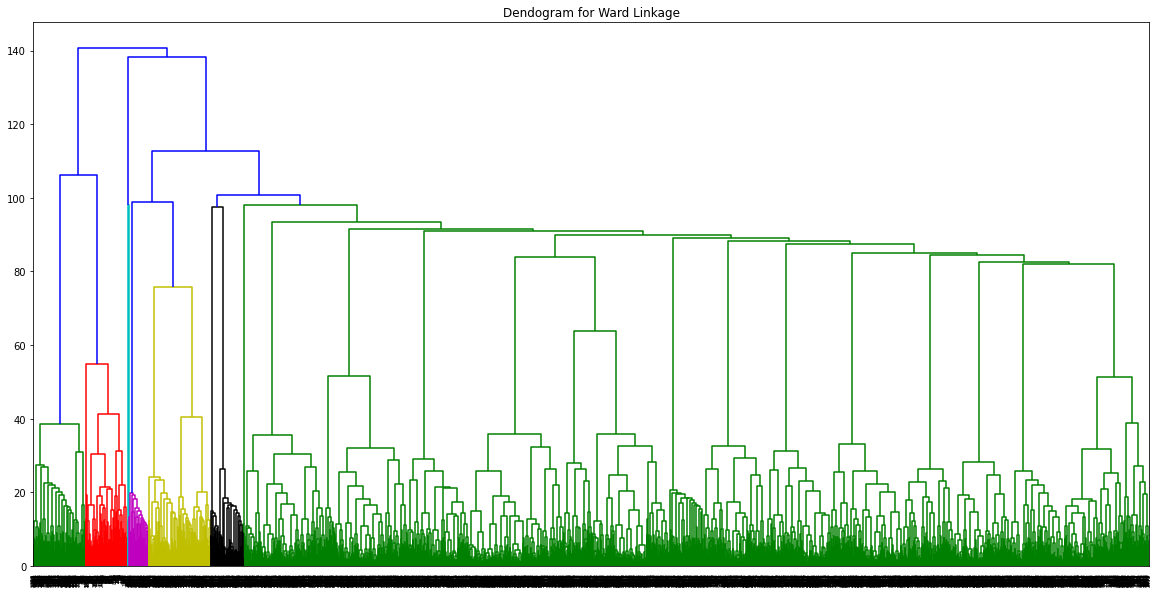

In [0]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.title('Dendogram for Ward Linkage')
plt.show()

##DBSCAN Clustering

In [0]:
samples = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for n in samples:
  dbscan_cluster = DBSCAN(eps=12, min_samples=n)

  clusters = dbscan_cluster.fit_predict(X_std)
  print("The silhouette score of the DBSCAN solution with {0} clusters: {1}"
      .format((n),(metrics.silhouette_score(X_std, clusters, metric='euclidean'))))

The silhouette score of the DBSCAN solution with 2 clusters: 0.6913966415095781
The silhouette score of the DBSCAN solution with 3 clusters: 0.6913966415095781
The silhouette score of the DBSCAN solution with 4 clusters: 0.6932568250859036
The silhouette score of the DBSCAN solution with 5 clusters: 0.6925539749578928
The silhouette score of the DBSCAN solution with 6 clusters: 0.6925539749578928
The silhouette score of the DBSCAN solution with 7 clusters: 0.6925539749578928
The silhouette score of the DBSCAN solution with 8 clusters: 0.7644046024310958
The silhouette score of the DBSCAN solution with 9 clusters: 0.7644046024310958
The silhouette score of the DBSCAN solution with 10 clusters: 0.7644046024310958
The silhouette score of the DBSCAN solution with 11 clusters: 0.7644046024310958
The silhouette score of the DBSCAN solution with 12 clusters: 0.7644046024310958
The silhouette score of the DBSCAN solution with 13 clusters: 0.7644046024310958
The silhouette score of the DBSCAN s

After playing around with the eps values and seeing the dbscan silhouette score for the dbscan clusters with minimum samples 2-20, the best was with an eps of 12 and 8 clusters, with a silhouette score of 0.76. This has been the best so far. 

## Gaussian Mixture Model Clustering

In [0]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
for n in samples:
  gmm_cluster = GaussianMixture(n_components=n, random_state=123)

  clusters = gmm_cluster.fit_predict(X_std)
  print("The silhoutte score of the GMM solution with {} clusters: {}"
      .format((n), (metrics.silhouette_score(X_std, clusters, metric='euclidean'))))
  
#The best performing one here is with 17 clusters.

The silhoutte score of the GMM solution with 2 clusters: 0.2694375837565894
The silhoutte score of the GMM solution with 3 clusters: 0.1454087351265991
The silhoutte score of the GMM solution with 4 clusters: 0.025796861724020004
The silhoutte score of the GMM solution with 5 clusters: 0.05537418526855203
The silhoutte score of the GMM solution with 6 clusters: 0.06562464173437244
The silhoutte score of the GMM solution with 7 clusters: 0.07298736004697419
The silhoutte score of the GMM solution with 8 clusters: 0.07357076537607957
The silhoutte score of the GMM solution with 9 clusters: 0.08593512208986726
The silhoutte score of the GMM solution with 10 clusters: 0.12954175582709498
The silhoutte score of the GMM solution with 11 clusters: 0.13579553238000658
The silhoutte score of the GMM solution with 12 clusters: 0.14164706819369333
The silhoutte score of the GMM solution with 13 clusters: 0.13918923508485326
The silhoutte score of the GMM solution with 14 clusters: 0.1581891963586

## Dimensionality Reduction Techniques
I am now going to begin performing dimensionality reduction on the data

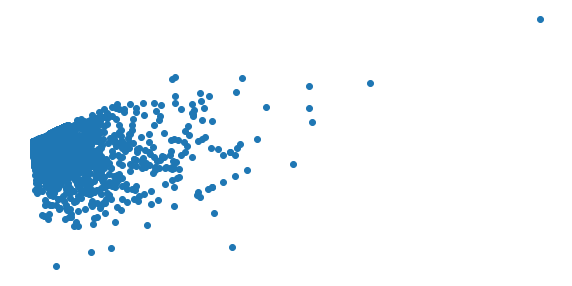

In [0]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(numeric_and_dummies_subset)
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
#This doesn't really do a good job at seperating the clusters...

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 4764 samples in 0.029s...
[t-SNE] Computed neighbors for 4764 samples in 0.477s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4764
[t-SNE] Computed conditional probabilities for sample 2000 / 4764
[t-SNE] Computed conditional probabilities for sample 3000 / 4764
[t-SNE] Computed conditional probabilities for sample 4000 / 4764
[t-SNE] Computed conditional probabilities for sample 4764 / 4764
[t-SNE] Mean sigma: 39.721579
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.744869
[t-SNE] KL divergence after 300 iterations: 0.942727


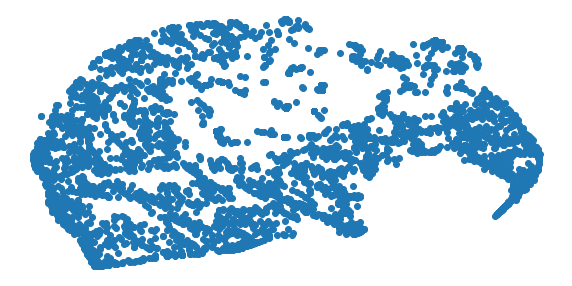

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=300)
tsne_results = tsne.fit_transform(numeric_and_dummies_subset)
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
#After playing around with the number of components, perplexity and number of iterations, this has shown to produce better results than pca reduction

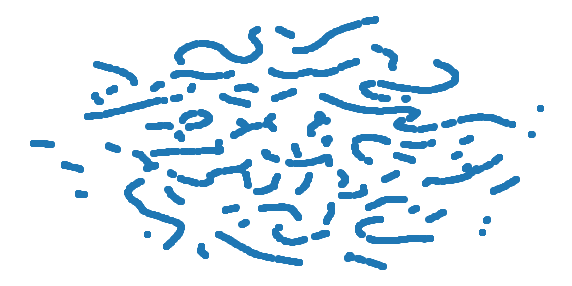

In [0]:
import umap
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.2,
                      metric='correlation').fit_transform(numeric_and_dummies_subset)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
#After playing around with the number of neighbors and the distance, this produces the best result by far. 

## Key Takeaways
As we can see in the above, we have found good dimensionality reduction and clustering models. The best clustering is with DBSCAN clustering with an epsilon value of 12 and 8 clusters. The best dimensionality reduction technique was the umap dimensionality reduction with 10 neighbors and a minimum distance of 0.2. 

These results can prove useful as to group movies from this database that are similar to one another. With this grouping, we can find movies that are simular to one another and recommend them accordingly to consumers. 